### Vighnesh Mane (210021607) - PG

In [ ]:
# Google Colab Setup (reference: Lab 07)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# recall the path in Google Drive (reference: Lab 07)
import os
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CW_Folder_PG' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['CW_Dataset.zip', '.DS_Store', 'Video', 'Code', 'Models', 'test_functions.ipynb']


In [ ]:
GOOGLE_DRIVE_PATH

'drive/My Drive/CW_Folder_PG'

In [ ]:
# update opencv (reference: Lab 07)
!pip install opencv-python==4.5.5.64

     |████████████████████████████████| 60.5 MB 1.3 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# check correct opencv version (reference: Lab 07)
!pip show opencv-python

Name: opencv-python
Version: 4.5.5.64
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: imgaug, dopamine-rl, albumentations


In [ ]:
# copy and unzip dataset directly on the Colab server (reference: Lab 07)
# Identify path to zipped dataset
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset.zip')

# Copy it to Colab
!cp '{zip_path}' .

# Unzip it
!yes|unzip -q CW_Dataset.zip

# Delete zipped version from Colab (not from Drive)
!rm CW_Dataset.zip

In [ ]:
# import libraries
import cv2
from sklearn.model_selection import train_test_split
from skimage import img_as_ubyte, io, color
from sklearn.cluster import MiniBatchKMeans
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
%matplotlib inline

In [ ]:
# import data from the respective directories (reference : Lab 07)
# Here we have not considered labels_list = None
def loading_im_lab_data(path):
  # getting image files from the directories
  folder_images = [folder for folder in sorted(os.listdir(path)) if folder.endswith('.jpg')]
  images = [cv2.imread(os.path.join(path, folder)) for folder in folder_images]
  # getting label files from the directories
  folder_labels = open("labels/list_label_" + path + ".txt", "r")
  labels = [row.split(' ')[1][0] for row in folder_labels]
  return images, labels
X_train, y_train = loading_im_lab_data("train")
X_test, y_test = loading_im_lab_data("test")

In [ ]:
# (reference: https://www.w3schools.com/python/ref_func_len.asp#:~:text=The%20len()%20function%20returns,of%20characters%20in%20the%20string.)
# checking the length of the training data and testing data
print(len(y_train))
print(len(y_test))

12271
3068


In [ ]:
# (reference : Lab 07)
print(Counter(y_train))
print(Counter(y_test))

Counter({'4': 4772, '7': 2524, '5': 1982, '1': 1290, '3': 717, '6': 705, '2': 281})
Counter({'4': 1185, '7': 680, '5': 478, '1': 329, '6': 162, '3': 160, '2': 74})


In [ ]:
# (reference : Lab 07)
# (reference : https://www.kaggle.com/code/manikg/training-svm-classifier-with-hog-features/notebook)
# applying histograms of gradients on images
from skimage.feature import hog
# Create empty lists for feature descriptors and labels
ppc = 16
cpb = 1
hog_imgs = []
hog_features = []

for z in range(len(X_train)):
    # Identify keypoints and extract descriptors
    img = img_as_ubyte(color.rgb2gray(X_train[z]))
    feature_matrix, hog_img = hog( img, orientations=8, pixels_per_cell=(ppc, ppc),  cells_per_block=(cpb, cpb), visualize=True)
    
    hog_imgs.append(hog_img)
    hog_features.append(feature_matrix)

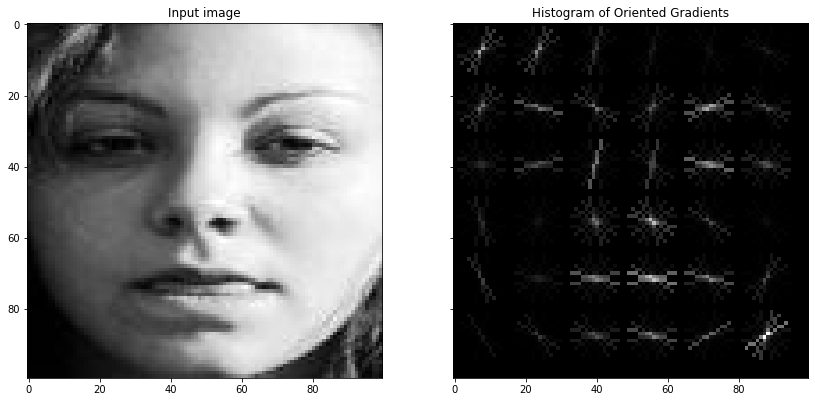

In [ ]:
# (reference: https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True) 

ax1.imshow(img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

ax2.imshow(hog_img, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [ ]:
# (reference : Lab 06 & Lab 07)
# (reference : https://www.kaggle.com/code/manikg/training-svm-classifier-with-hog-features/notebook)
# convert descriptors into histograms of codewords for each image
hist_list = []
for i in range(len(X_test)):
    img = img_as_ubyte(color.rgb2gray(X_test[i]))
    feature_matrix, hog_img = hog( img, orientations=8, pixels_per_cell=(ppc, ppc),  cells_per_block=(cpb, cpb), visualize=True)
    hist_list.append(feature_matrix)
hist_array3 = np.vstack(hist_list)

In [ ]:
# (reference : Lab 07)
# Create a classifier: Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
class_mlp_hog = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=True, random_state=1,
                    learning_rate_init=.1)

In [ ]:
# (reference : Lab 07)
# fitting mlp classifier
class_mlp_hog.fit(hog_features,y_train)

Iteration 1, loss = 1.54760528
Iteration 2, loss = 1.34988653
Iteration 3, loss = 1.24581075
Iteration 4, loss = 1.19110205
Iteration 5, loss = 1.17988735
Iteration 6, loss = 1.15186770
Iteration 7, loss = 1.13245972
Iteration 8, loss = 1.10489298
Iteration 9, loss = 1.11470751
Iteration 10, loss = 1.10059856
Iteration 11, loss = 1.08235184
Iteration 12, loss = 1.08159124
Iteration 13, loss = 1.07419623
Iteration 14, loss = 1.06468501
Iteration 15, loss = 1.05744777
Iteration 16, loss = 1.05483351
Iteration 17, loss = 1.04769403
Iteration 18, loss = 1.04274225
Iteration 19, loss = 1.03023971
Iteration 20, loss = 1.03005590
Iteration 21, loss = 1.03724009
Iteration 22, loss = 1.02470853
Iteration 23, loss = 1.05520112
Iteration 24, loss = 1.03087091
Iteration 25, loss = 1.02694967
Iteration 26, loss = 1.01956598
Iteration 27, loss = 1.01865859
Iteration 28, loss = 1.01385171
Iteration 29, loss = 1.02199256
Iteration 30, loss = 1.01125918
Iteration 31, loss = 1.01941199
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100,
              random_state=1, solver='sgd', verbose=True)

In [ ]:
#(reference: Lab 07)
# predciting the mlp classifier
class_mlp_hog_predict = class_mlp_hog.predict(hist_array3).tolist()

In [ ]:
#(reference: Lab 07)
import warnings
warnings.filterwarnings("ignore")
#quantitative evaluation of the model's performance
print(f"""Classification report for classifier {class_mlp_hog}:
      {metrics.classification_report(y_test, class_mlp_hog_predict)}\n""")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100,
              random_state=1, solver='sgd', verbose=True):
                    precision    recall  f1-score   support

           1       0.64      0.40      0.49       329
           2       0.59      0.26      0.36        74
           3       0.19      0.03      0.05       160
           4       0.90      0.52      0.66      1185
           5       0.29      0.82      0.43       478
           6       0.55      0.32      0.41       162
           7       0.50      0.52      0.51       680

    accuracy                           0.51      3068
   macro avg       0.53      0.41      0.42      3068
weighted avg       0.63      0.51      0.52      3068




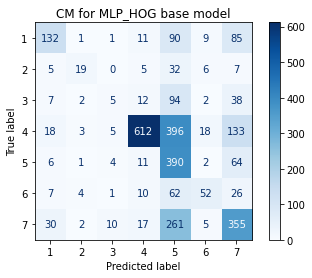

In [ ]:
# (reference : Lab 07)
# confusion matrix for base svm_hog model
metrics.ConfusionMatrixDisplay.from_predictions(y_test, class_mlp_hog_predict,cmap=plt.cm.Blues)
plt.title('CM for MLP_HOG base model')
plt.show()

In [ ]:
# (reference : https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa)
from sklearn.model_selection import GridSearchCV
mlp_parameters = {'activation': ['tanh', 'relu'],'solver': ['sgd', 'adam'],'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}
class_mlp_hog_para = GridSearchCV(MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes=(3,3), alpha=1e-5), mlp_parameters, n_jobs=-1, cv=3)
class_mlp_hog_para.fit(hog_features, y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3),
                                     random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print(class_mlp_hog_para.best_params_)
print(class_mlp_hog_para.best_estimator_)

{'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}
MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(3, 3),
              random_state=1)


In [ ]:
# (reference: Lab 07)
# create mlp model with best hyperparameters obtained from grid search
# Create a classifier: a support vector classifier with best hyperparameters
class_mlp_hog_best_para = MLPClassifier(hidden_layer_sizes=(3,3), max_iter=100, alpha=0.05,
                    solver='adam', verbose=True, random_state=1,
                    learning_rate = 'constant',activation = 'tanh')
class_mlp_hog_best_para.fit(hog_features, y_train)

Iteration 1, loss = 1.84506460
Iteration 2, loss = 1.73222076
Iteration 3, loss = 1.67794918
Iteration 4, loss = 1.63401090
Iteration 5, loss = 1.59850645
Iteration 6, loss = 1.56599278
Iteration 7, loss = 1.53437241
Iteration 8, loss = 1.50637309
Iteration 9, loss = 1.48254585
Iteration 10, loss = 1.46554261
Iteration 11, loss = 1.44942800
Iteration 12, loss = 1.43802888
Iteration 13, loss = 1.42795687
Iteration 14, loss = 1.42229534
Iteration 15, loss = 1.41445853
Iteration 16, loss = 1.41038340
Iteration 17, loss = 1.40457706
Iteration 18, loss = 1.40139741
Iteration 19, loss = 1.39937480
Iteration 20, loss = 1.39715348
Iteration 21, loss = 1.39125661
Iteration 22, loss = 1.39014693
Iteration 23, loss = 1.38612756
Iteration 24, loss = 1.38306754
Iteration 25, loss = 1.38193882
Iteration 26, loss = 1.37890702
Iteration 27, loss = 1.37637871
Iteration 28, loss = 1.37474335
Iteration 29, loss = 1.37026341
Iteration 30, loss = 1.37207751
Iteration 31, loss = 1.36603488
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(3, 3),
              max_iter=100, random_state=1, verbose=True)

In [ ]:
# predciting the mlp classifier
class_mlp_hog_best_predict = class_mlp_hog_best_para.predict(hist_array3).tolist()

In [ ]:
#(reference: Lab 07)
import warnings
warnings.filterwarnings("ignore")
#quantitative evaluation of the model's performance
print(f"""Classification report for classifier {class_mlp_hog_best_para}:
      {metrics.classification_report(y_test, class_mlp_hog_best_predict)}\n""")

Classification report for classifier MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(3, 3),
              max_iter=100, random_state=1, verbose=True):
                    precision    recall  f1-score   support

           1       0.46      0.32      0.38       329
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       160
           4       0.75      0.81      0.78      1185
           5       0.44      0.31      0.37       478
           6       0.43      0.30      0.35       162
           7       0.47      0.76      0.58       680

    accuracy                           0.58      3068
   macro avg       0.36      0.36      0.35      3068
weighted avg       0.53      0.58      0.54      3068




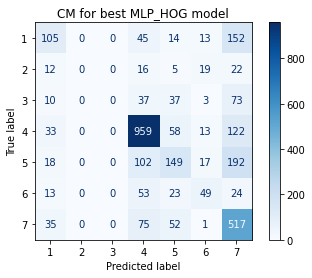

In [ ]:
# (reference : Lab 07)
# confusion matrix for mlp_hog model with best hyperparameters
metrics.ConfusionMatrixDisplay.from_predictions(y_test, class_mlp_hog_best_predict,cmap=plt.cm.Blues)
plt.title('CM for best MLP_HOG model')
plt.show()

In [ ]:
# (reference : Lab 07)
from joblib import dump, load
dump(class_mlp_hog_best_para, 'mlp_hog.joblib')

['mlp_hog.joblib']

In [ ]:
class_mlp_hog_best_para = load('mlp_hog.joblib')